# Segunda parte
## Pasos a seguir

1. Filtrar el DataFrame para incluir únicamente las filas correspondientes a los ganadores de medallas de 2016 en los deportes mencionados en la descripción de la actividad

2. Observe las características del conjunto de datos y anote su tipo de datos: ¿son categóricos o numéricos?

3. Evaluar cuál sería la visualización adecuada para que un patrón global represente las características de height y weight

4. Evaluar cuál sería la visualización adecuada para representar las estadísticas resumidas de las características de height y weight en función de las medallas, separadas además por género de los atletas.

## Desarrollo

Se repite el mismo proceso realizado en la primera parte relacionada a los filtros aplicados a la base de datos original. 

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from numpy import mean
warnings.filterwarnings('ignore')
df = pd.read_csv('athlete_events.csv')
df2016m =  df.query('Year == 2016')
df2016m =  df2016m[df2016m['Medal'].notna()]
sports = ['Athletics', 'Swimming', 'Rowing', 'Football', 'Hockey']
df2016m = df2016m[df2016m['Sport'].isin(sports)]
df2016m.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
814,465,"Matthew ""Matt"" Abood",M,30.0,197.0,92.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
1228,690,Chantal Achterberg,F,31.0,172.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver
1529,846,Valerie Kasanita Adams-Vili (-Price),F,31.0,193.0,120.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Silver
1847,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,Bronze


Quedando un conjunto de datos de ***732*** *registros* y ***15*** *variables*, 5 numéricas y 10 categóricas.

- Nombre `ID`: numérica.
- Nombre `Name`: categórica.
- Sexo `Sex`: categórica.
- Edad `Age`: numérica.
- Altura `Height`: numérica.
- Peso `Weight`: numérica.
- Equipo `Team`: categórica.
- NOC `NOC`: categórica.
- Juegos `Games`: categórica.
- Año `Year`: numérica.
- Temporada `Season`: categórica.
- Ciudad `City`: categórica.
- Deporte `Sport`: categórica.
- Evento `Event`: categórica.
- Medalla `Medal`: categórica.


In [2]:
df2016m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 732 entries, 158 to 271019
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      732 non-null    int64  
 1   Name    732 non-null    object 
 2   Sex     732 non-null    object 
 3   Age     732 non-null    float64
 4   Height  729 non-null    float64
 5   Weight  727 non-null    float64
 6   Team    732 non-null    object 
 7   NOC     732 non-null    object 
 8   Games   732 non-null    object 
 9   Year    732 non-null    int64  
 10  Season  732 non-null    object 
 11  City    732 non-null    object 
 12  Sport   732 non-null    object 
 13  Event   732 non-null    object 
 14  Medal   732 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 91.5+ KB


De las cinco variables numéricas encontradas, una corresponde a la ID del participante. Variables como la edad fluctúa entre los 16 y 40 años, con una media de 25.5 (sd: 4.45) años, la altura oscila entre los 150cm y 207cm con una media de 180cm (sd: 10.07cm) y el peso entre 40kg y 136kg con una media de 73.7kg (sd: 14.27). 

In [3]:
df2016m.describe()

,ID,Age,Height,Weight,Year
count,732.000000,732.000000,729.000000,727.000000,732.0
mean,68648.244536,25.577869,180.023320,73.720770,2016.0
std,39361.251654,4.451373,10.076398,14.279014,0.0
min,62.000000,16.000000,150.000000,40.000000,2016.0
25%,32676.750000,22.000000,173.000000,64.000000,2016.0
50%,73187.000000,25.000000,180.000000,72.000000,2016.0
75%,103225.000000,29.000000,187.000000,82.000000,2016.0
max,135525.000000,40.000000,207.000000,136.000000,2016.0


NameError: name 'sns' is not defined

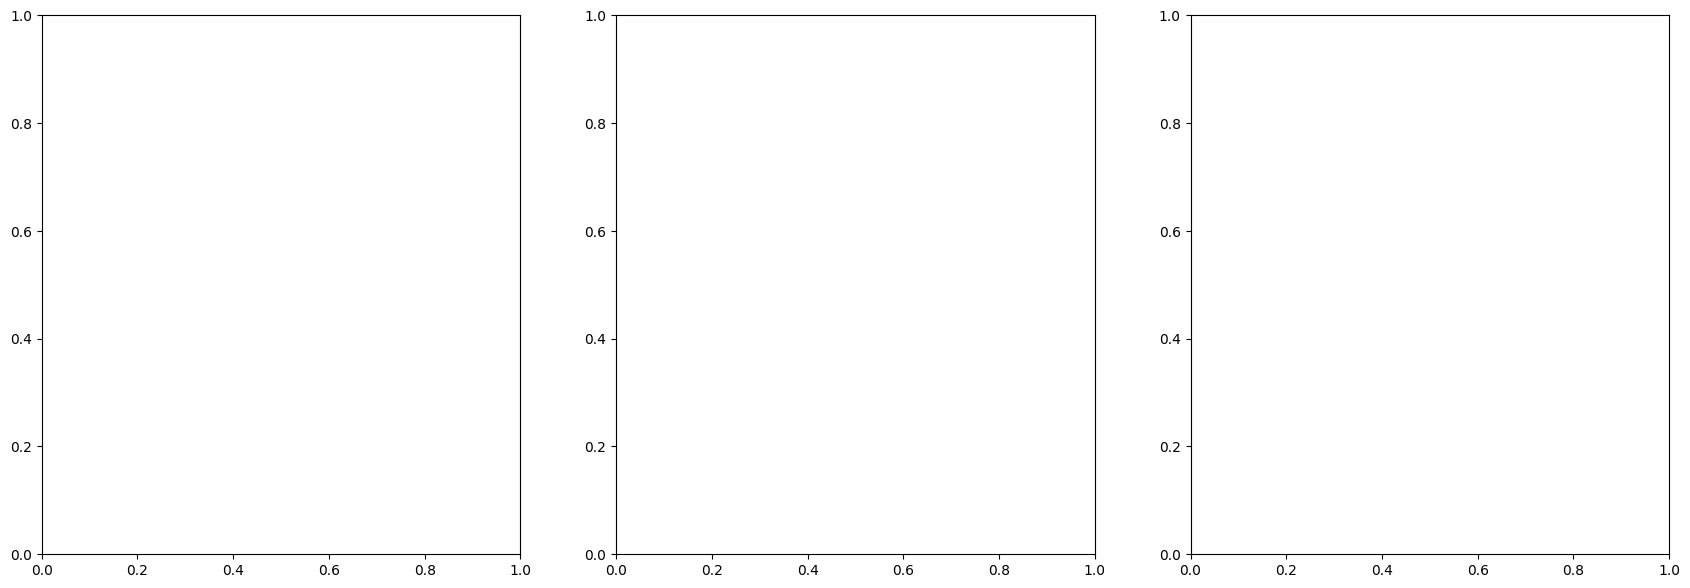

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(21, 7))

sns.scatterplot(data=df2016m, x="Height", y="Weight", hue="Medal", palette="Set2", style="Medal", ax=axes[0])
axes[0].set(title="Peso y altura por medalla", xlabel="Altura en centímetros", ylabel="Peso en kilogramos")


sns.scatterplot(data=df2016m, x="Height", y="Weight", hue="Sex", palette="Set2", style="Sex", ax=axes[1])
axes[1].set(title="Peso y altura por sexo", xlabel="Altura en centímetros", ylabel="Peso en kilogramos")

sns.scatterplot(data = df2016m, x = df2016m['Height'], y = df2016m['Weight'], hue = df2016m['Sport'], palette = 'Set2', style = df2016m['Sport'], ax = axes[2])
axes[2].set(title = 'Peso y altura por deporte', xlabel = 'Altura en centímetros', ylabel = 'Peso en kilogramos')

plt.tight_layout()

plt.show()

En la gráfica de dispersión presentada se puede notar precisamente la diferencia entre los pesos esperada por la media ya vista en la primera parte en función del género. No parece haber una diferencia entre el peso y altura según el tipo de medalla. Es curioso como tanto el menor y mayor peso se dan en atletismo, en la gráfica que relaciona peso y altura con el deporte tampoco se aprecia una gran diferencia entre los diferentes deportes. De igual manera, se realizará un análisis con diagrama de cajas tanto para tipo de medalla como para deporte.

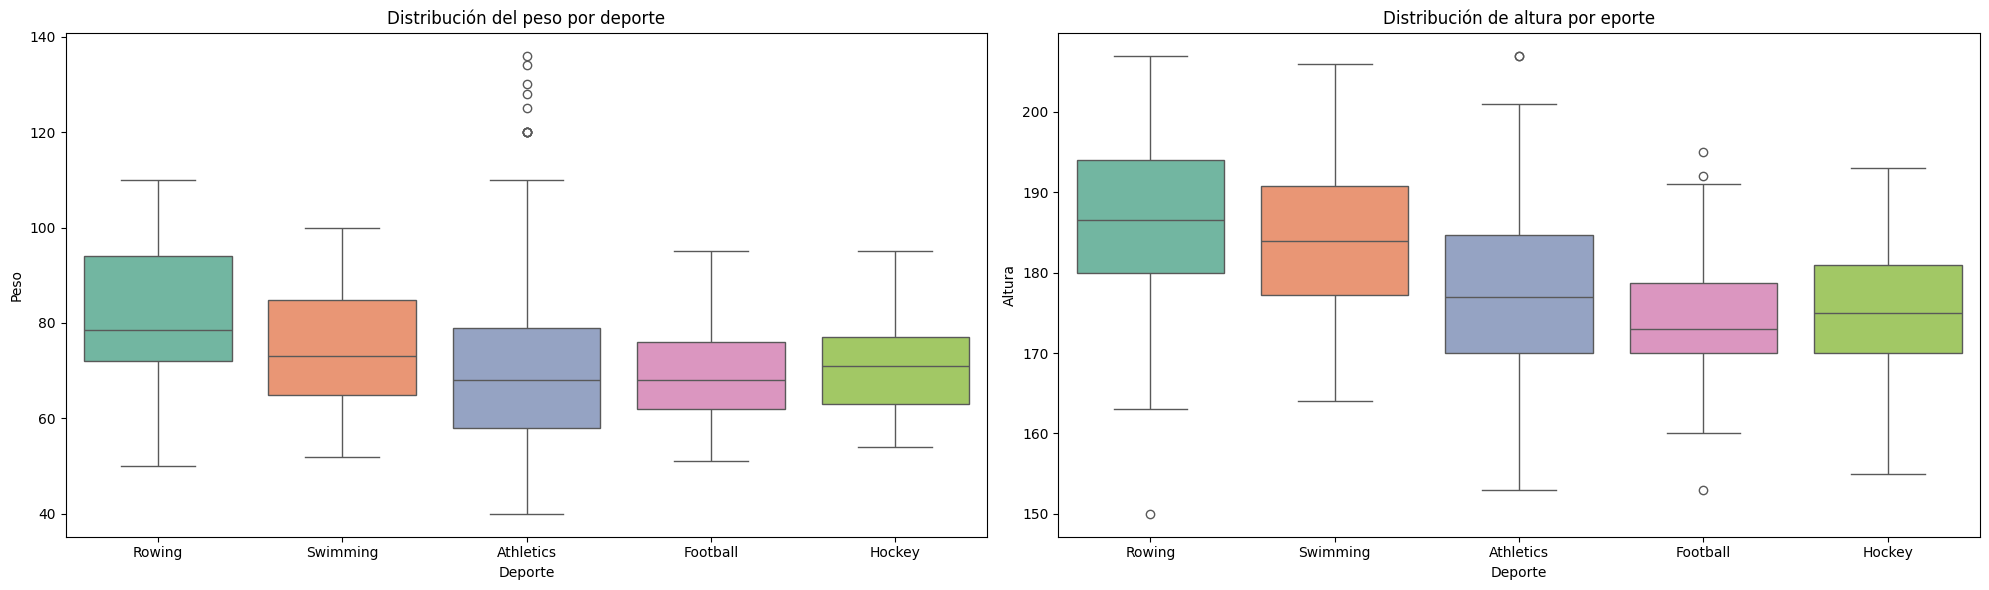

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.boxplot(x="Sport", y="Weight", data=df2016m, palette="Set2", ax=axes[0])
axes[0].set(xlabel="Deporte", ylabel="Peso", title="Distribución del peso por deporte")

sns.boxplot(x="Sport", y="Height", data=df2016m, palette="Set2", ax=axes[1])
axes[1].set(xlabel="Deporte", ylabel="Altura", title="Distribución de altura por eporte")

plt.tight_layout()
plt.show()

In [23]:
df2016m.groupby('Sport')['Weight'].describe()

,count,mean,std,min,25%,50%,75%,max
Sport,,,,,,,,
Athletics,189.0,70.783069,18.333220,40.0,58.0,68.0,79.00,136.0
Football,105.0,69.161905,9.573726,51.0,62.0,68.0,76.00,95.0
Hockey,99.0,70.797980,9.637279,54.0,63.0,71.0,77.00,95.0
Rowing,144.0,81.722222,13.729375,50.0,72.0,78.5,94.00,110.0
Swimming,190.0,74.621053,11.550376,52.0,65.0,73.0,84.75,100.0


In [24]:
df2016m.groupby('Sport')['Height'].describe()

,count,mean,std,min,25%,50%,75%,max
Sport,,,,,,,,
Athletics,190.0,177.394737,10.579354,153.0,170.00,177.0,184.75,207.0
Football,106.0,174.509434,7.912913,153.0,170.00,173.0,178.75,195.0
Hockey,99.0,175.676768,7.907408,155.0,170.00,175.0,181.00,193.0
Rowing,144.0,185.979167,9.428026,150.0,180.00,186.5,194.00,207.0
Swimming,190.0,183.478947,8.472619,164.0,177.25,184.0,190.75,206.0


Revisando el peso y altura en atletismo, se puede notar que en ambas características es el deporte con un mayor rango de valores, además de la presencia de varios datos átipicos. En el caso del fútbol y hockey, se puede notar una gran concentración de medallistas (50%) entre 62kg y 76kg en fútbol y entre 63kg y 77kg en hockey (RIQ: 14kg). 

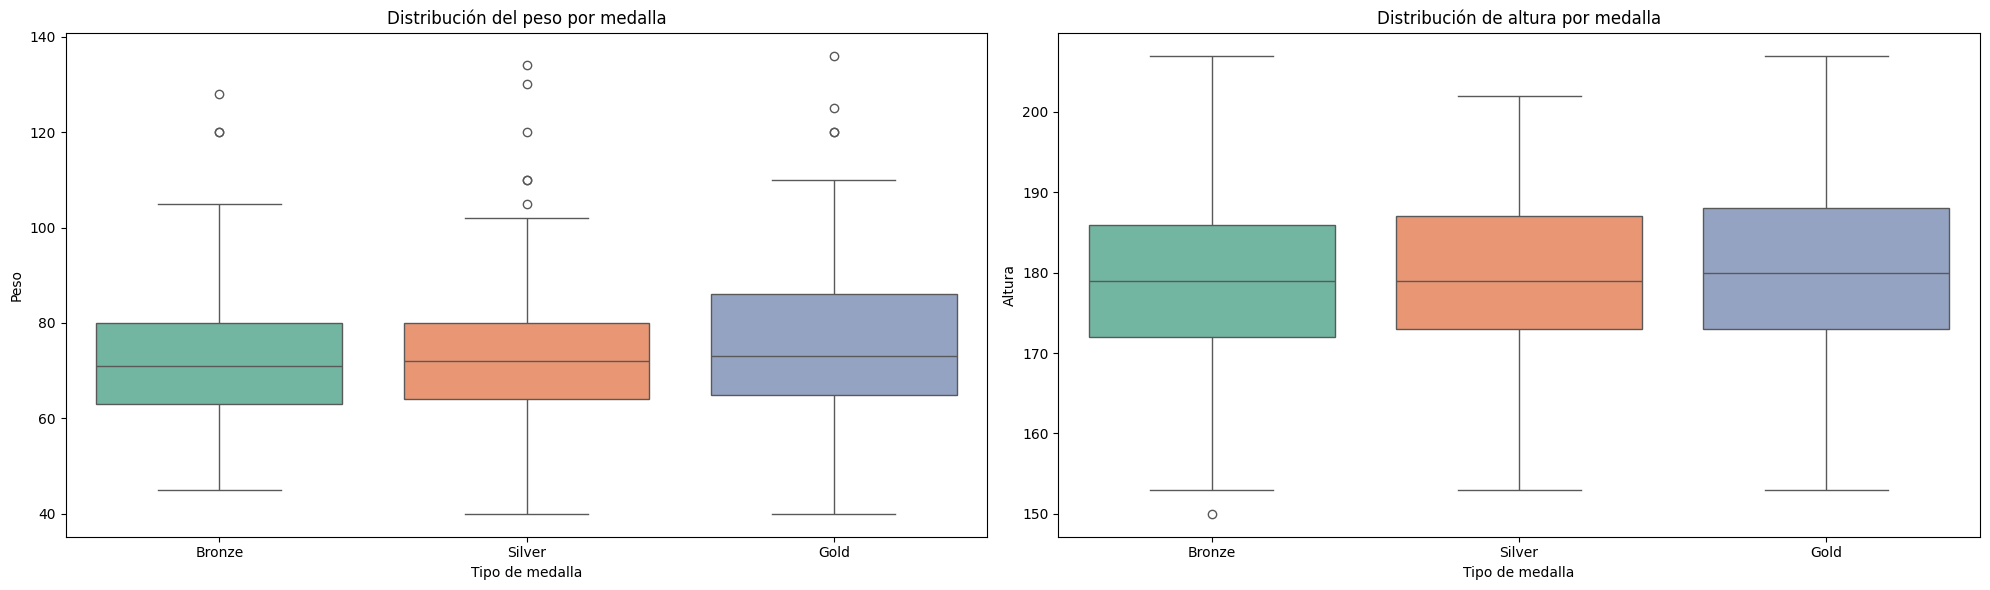

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.boxplot(x="Medal", y="Weight", data=df2016m, palette="Set2", ax=axes[0])
axes[0].set(xlabel="Tipo de medalla", ylabel="Peso", title="Distribución del peso por medalla")

sns.boxplot(x="Medal", y="Height", data=df2016m, palette="Set2", ax=axes[1])
axes[1].set(xlabel="Tipo de medalla", ylabel="Altura", title="Distribución de altura por medalla")

plt.tight_layout()
plt.show()

No se puede ver una gran diferencia entre la distribución del peso y altura según el tipo de medalla ganada. Se destaca la presencia de valores átipicos en el peso de las tres categorías. 

Veamos ahora si existe una diferencia entre el género, peso, altura y tipo de medalla ganada.

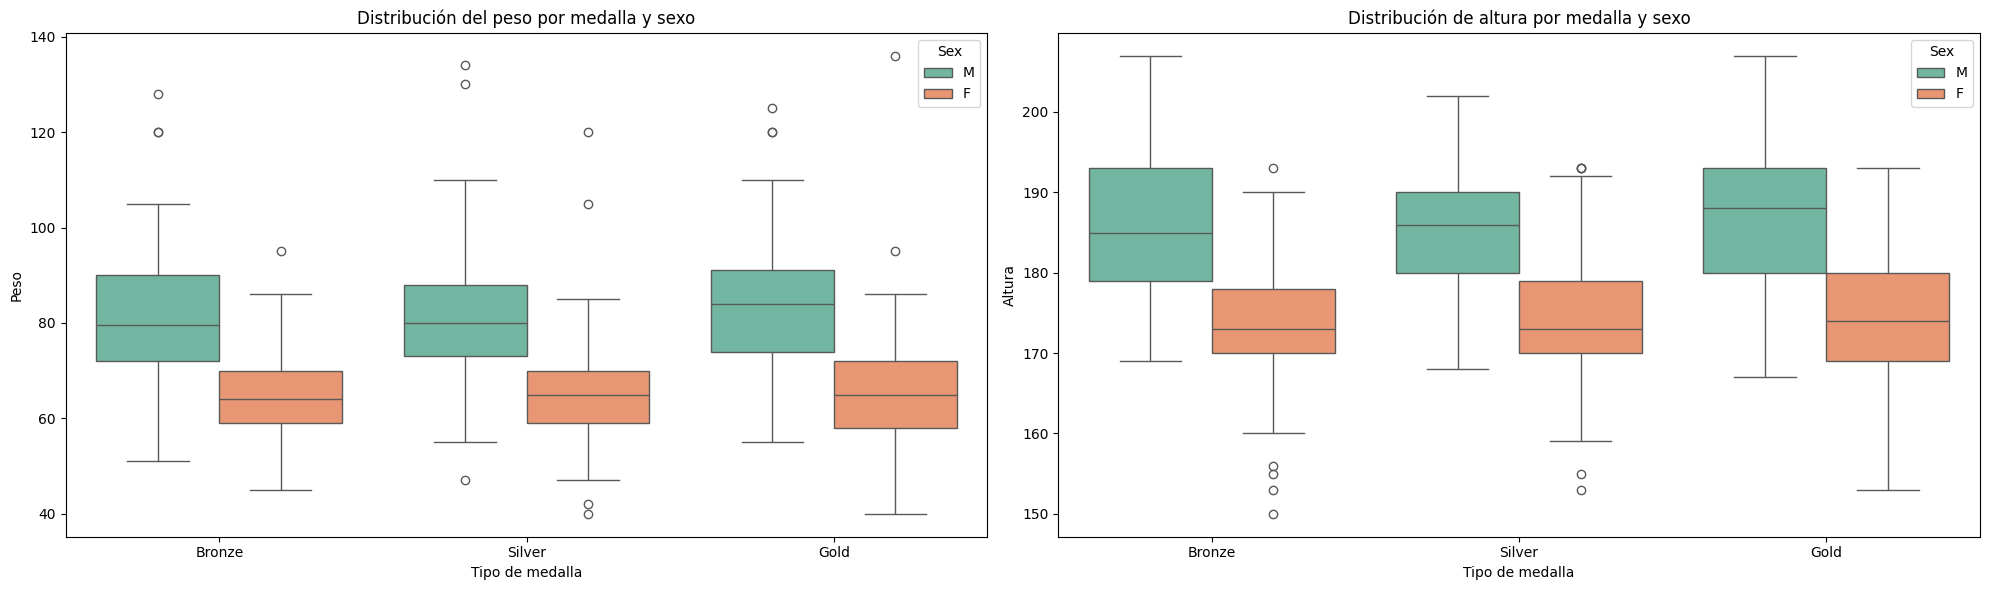

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.boxplot(x="Medal", y="Weight", hue = 'Sex', data=df2016m, palette="Set2", ax=axes[0])
axes[0].set(xlabel="Tipo de medalla", ylabel="Peso", title="Distribución del peso por medalla y sexo")

sns.boxplot(x="Medal", y="Height", hue = 'Sex', data=df2016m, palette="Set2", ax=axes[1])
axes[1].set(xlabel="Tipo de medalla", ylabel="Altura", title="Distribución de altura por medalla y sexo")

plt.tight_layout()
plt.show()

Es muy visible el hecho de que, al menos, el 75% de las mujeres ganadoras de los diferentes tipos medallas presentan un peso y altura menor a los hombres ganadores de su mismo tipo de medalla. La distribución de los pesos y alturas de las mujeres que ganaron medallas de bronce y plata parecen ser muy similares, en cambio, las mujeres ganadoras de oro suelen diferir un poco de esta distribución (cajas y bigotes ligeramente más grandes). También se encuentran datos átipicos, excepto en la altura de hombres ganadores de bronce y competidores ganadores de oro.